<a href="https://colab.research.google.com/github/Dr-Carlos-Villasenor/Clase_Aprendizaje_Profundo/blob/main/L06_01_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje profundo
##Dr. Carlos Villaseñor
###Validación cruzada



Paso 1. Primeramente vamos a importar unos paquetes básicos

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

Paso 2. Importemos un dataset nuevo

Importaremos el dataset "Iris" el cual tiene diferentes caracteristicas de tres tipos de flores!
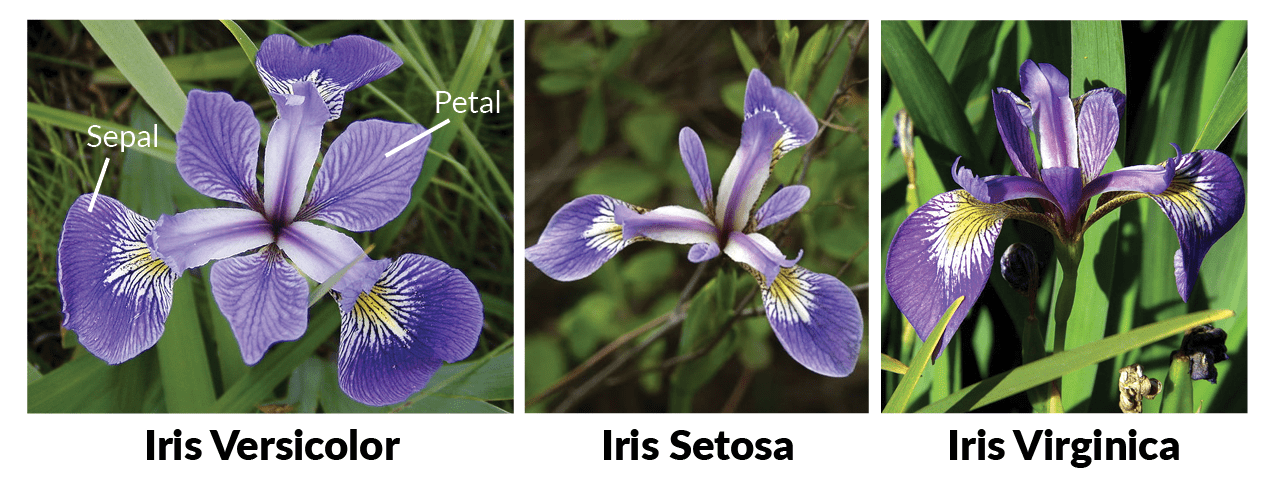

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target
print(x.shape, y.shape)

Paso 3. Particionemos el dataset en conjunto de entrenamiento y prueba, y transforma la salida en su codificación one-hot.

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)
ytrain = keras.utils.to_categorical(ytrain)
ytest = keras.utils.to_categorical(ytest)

Paso 4. Empaquetemos los datos

In [8]:
inputs = np.concatenate((xtrain, xtest), axis=0)
targets = np.concatenate((ytrain, ytest), axis=0)

Paso 5. Crear K-fold para validación cruzada

In [9]:
# Define the K-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)

Paso 6. Crea un bucle donde entrenemos un modelo para cada K-fold

In [ ]:
fold_no = 1
acc_per_fold = []
loss_per_fold = []
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(256, activation='relu', 
                  kernel_initializer='glorot_uniform', input_shape=[x.shape[1]]))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(3, activation='softmax'))

  # Compile the model
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
                      batch_size=25, epochs=100, verbose=0)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1  

print('------------------------------------------------------------------------')
print('Final score')
print('Mean loss:', sum(loss_per_fold)/num_folds)
print('Mean acc:', sum(acc_per_fold)/num_folds)
